In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    n1: int
    n2: int
    n3: int
    n4: int
    op1: str
    op2: str
    res1: int
    res2: int


In [2]:
def add1(state: AgentState) -> AgentState:
    state["res1"] = state["n1"] + state["n2"]
    return state

def sub1(state: AgentState) -> AgentState:
    state["res1"] = state["n1"] - state["n2"]
    return state

def add2(state: AgentState) -> AgentState:
    state["res2"] = state["n3"] + state["n4"]
    return state

def sub2(state: AgentState) -> AgentState:
    state["res2"] = state["n3"] - state["n4"]
    return state


In [3]:
def route1(state: AgentState) -> str:
    return "add1" if state["op1"] == "+" else "sub1"

def route2(state: AgentState) -> str:
    return "add2" if state["op2"] == "+" else "sub2"


In [4]:
graph = StateGraph(AgentState)

# register compute nodes
graph.add_node("add1", add1)
graph.add_node("sub1", sub1)
graph.add_node("add2", add2)
graph.add_node("sub2", sub2)

# ---- FIRST ROUTE (no router node) ----
graph.add_conditional_edges(
    START,
    route1,
    {
        "add1": "add1",
        "sub1": "sub1",
    }
)

# ---- SECOND ROUTE (branch again after first computation) ----
graph.add_conditional_edges(
    "add1",
    route2,
    {
        "add2": "add2",
        "sub2": "sub2",
    }
)

graph.add_conditional_edges(
    "sub1",
    route2,
    {
        "add2": "add2",
        "sub2": "sub2",
    }
)

# end
graph.add_edge("add2", END)
graph.add_edge("sub2", END)

app = graph.compile()


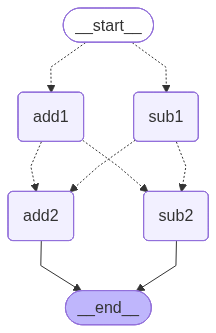

In [6]:
app

In [5]:
result = app.invoke({
    "n1": 1, "n2": 2,
    "n3": 3, "n4": 4,
    "op1": "+",
    "op2": "-",
    "res1": 0,
    "res2": 0
})

print(result)


{'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'op1': '+', 'op2': '-', 'res1': 3, 'res2': -1}
